**In this project, we will analyze how various factors affects an individual's overall health and identify the most important features affecting the age and Disease status.**




In [ ]:
!pip3 install pickle5
import pickle5 as pickle

#### Import necessary libraries


In [ ]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.model_selection import StratifiedKFold

# Load DNAm data


In [ ]:
# Read in  DNA data, a pickle data
infile = open('GSE42861.pkl','rb')
DNA_data= pickle.load(infile)
infile.close()

In [ ]:
DNA_data.head(2)

,dataset,age,gender,cg04601137,cg10064162,cg17559549,cg12441964,cg21493583,cg27318546,cg14156381,...,cg06291595,cg06521852,cg24024214,cg25148589,cg20692181,cg21207436,cg15299721,cg00884221,cg27638672,cg05593325
GSM1051525,GSE42861,67.0,F,0.34637,0.177525,0.073021,0.818903,0.167119,0.096741,0.431846,...,0.121812,0.204383,0.867147,0.235479,0.836472,0.793045,0.067196,0.072223,0.083744,0.265790
GSM1051526,GSE42861,49.0,F,0.36717,0.183482,0.084641,0.850975,0.251110,0.074172,0.456439,...,0.100869,0.197570,0.865686,0.230336,0.858362,0.798864,0.072268,0.069718,0.096331,0.283381


In [ ]:
DNA_data.shape

(689, 18613)

# Load metadata
## The metadata offers information for subject descriptions. You can utilize some features to enhance your model training.

In [ ]:
# Read in  DNA data, a pickle data
infile = open('GSE42861_metadata_2023.pkl','rb')
DNA_metadata= pickle.load(infile)
infile.close()

In [ ]:
DNA_metadata.head(10)

,GEO Accession,Disease State,Subject,Age,Gender,Smoking Status
GSM1051525,GSM1051525,rheumatoid arthritis,Patient,67,f,current
GSM1051526,GSM1051526,rheumatoid arthritis,Patient,49,f,current
GSM1051527,GSM1051527,rheumatoid arthritis,Patient,53,f,ex
GSM1051528,GSM1051528,rheumatoid arthritis,Patient,62,f,current
GSM1051529,GSM1051529,rheumatoid arthritis,Patient,33,f,never
GSM1051530,GSM1051530,rheumatoid arthritis,Patient,59,f,current
GSM1051531,GSM1051531,rheumatoid arthritis,Patient,66,f,never
GSM1051532,GSM1051532,rheumatoid arthritis,Patient,51,f,ex
GSM1051533,GSM1051533,Normal,Normal,55,m,current
GSM1051534,GSM1051534,Normal,Normal,37,m,never


# DNA_metadata
*   GEO Accession: Subject ID
*   Disease State: **the disease name** or  **Normal**
*   Subject: **Patient** or **Normal**
*   Age: age of the subject
*   Gender: **f** or **m**, we can ignore this feature in this project.
*   Smoking State:

      ex: previously smoked

      current: currently smoking

      never: no history of smoking
      
      occasional: occational smoking



In [ ]:
DNA_metadata.shape

(689, 6)

####DNA Data and Metadata Integration: Merging Data and Metadata Using Pandas

In [ ]:
merged_data = pd.merge(DNA_data, DNA_metadata, left_index=True, right_index=True)

## 2. Machine Learning Analysis

### 2.1 Exploratory Data Analysis (EDA)




####Visualization of Disease Status Distribution: Countplot of Disease State in Merged Data

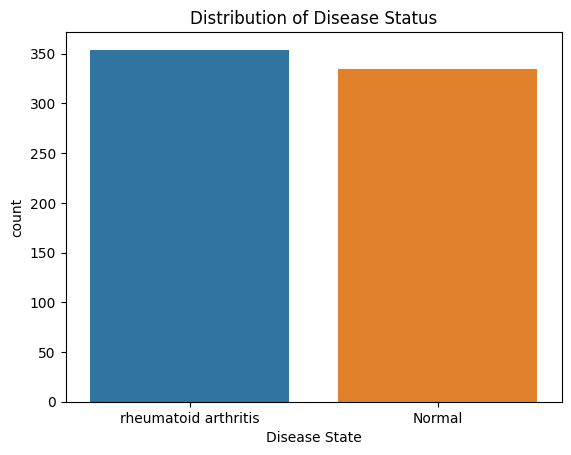

In [ ]:
sns.countplot(x='Disease State', data=merged_data)
plt.title('Distribution of Disease Status')
plt.show()

####Exploration of Age Distribution and Its Relationship with the Target: Histogram with KDE Plot

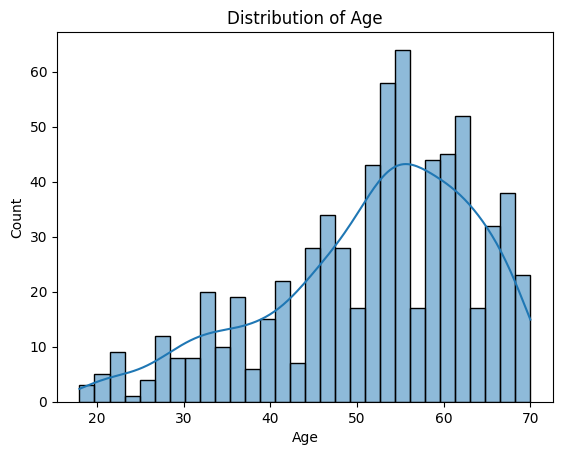

<Figure size 1000x600 with 0 Axes>

In [ ]:
sns.histplot(data=merged_data, x='Age', bins=30, kde=True)
plt.title('Distribution of Age')
plt.figure(figsize=(10, 6))
plt.show()

####Exploring and Analyzing the 'Age' Column: Data Type Check, Unique Values, and Count Distribution

In [ ]:
print(merged_data['Age'].dtype)
unique_ages = merged_data['Age'].unique()
age_counts = merged_data['Age'].value_counts().sort_index()
print(age_counts)

object
18     1
19     2
20     3
21     2
22     6
23     3
24     1
25     1
26     3
27     4
28     8
29     5
30     3
31     8
32    10
33    10
34     6
35     4
36     8
37    11
38     6
39     9
40     6
41    11
42    11
43     7
44    11
45    17
46    16
47    18
48    14
49    14
50    17
51    27
52    16
53    30
54    28
55    28
56    36
57    17
58    20
59    24
60    26
61    19
62    30
63    22
64    17
65    17
66    15
67    17
68    21
69    19
70     4
Name: Age, dtype: int64


####Conversion of 'Age' Column to Numeric: Handling Potential Data Type Issues

In [ ]:
merged_data['Age'] = pd.to_numeric(merged_data['Age'], errors='coerce')

####Visualization of Age Distribution by Disease Status: Boxplot Analysis

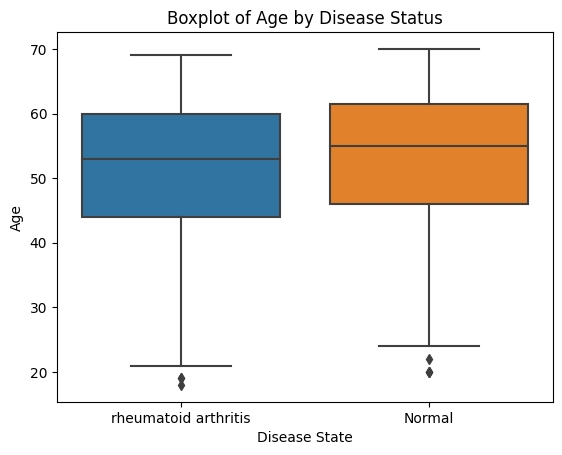

In [ ]:
sns.boxplot(x='Disease State', y='Age', data=merged_data)
plt.title('Boxplot of Age by Disease Status')
plt.show()


####Exploring Missing Values: Heatmap Visualization of Missing Values in Merged Data

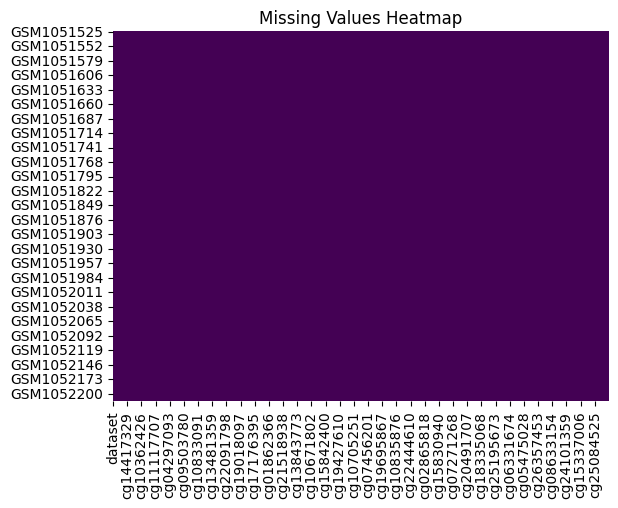

In [ ]:
sns.heatmap(merged_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

####Exploration of Gender and Smoking Status Distribution: Countplot Analysis

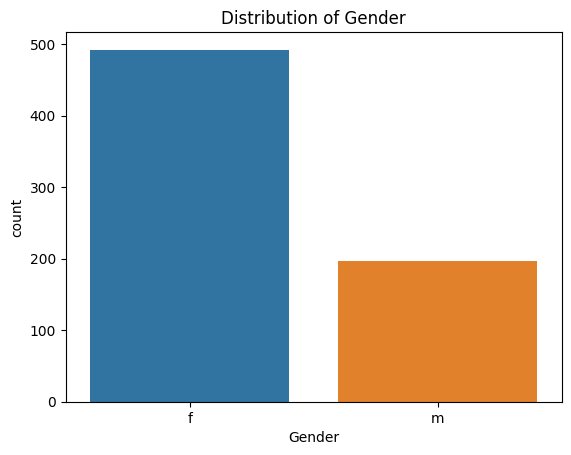

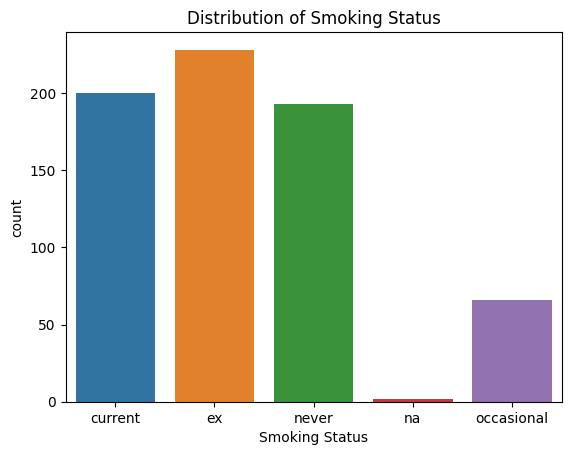

In [ ]:
sns.countplot(x='Gender', data=merged_data)
plt.title('Distribution of Gender')
plt.show()
sns.countplot(x='Smoking Status', data=merged_data)
plt.title('Distribution of Smoking Status')
plt.show()


####Age Distribution Across Disease Status: Violin Plot Analysis

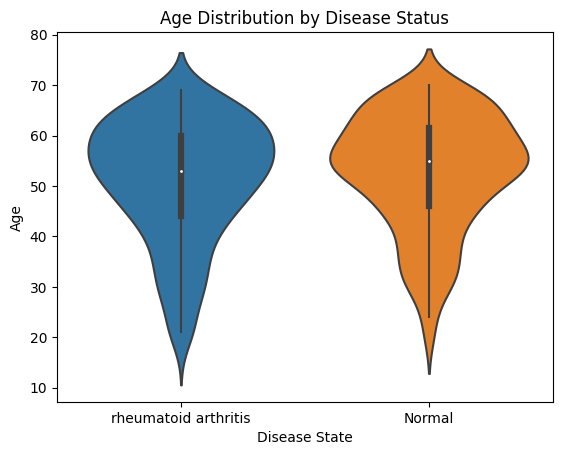

In [ ]:
sns.violinplot(x='Disease State', y='Age', data=merged_data)
plt.title('Age Distribution by Disease Status')
plt.show()


## 2.2 Feature Selection

####Feature Selection and Target Variable Assignment: Filtering Features and Defining Classification and Regression Targets

In [ ]:
features = merged_data.filter(regex='^cg', axis=1)
target_classification = merged_data['Disease State']
target_regression = merged_data['Age']


#### Split the data for classification

In [ ]:
X_class, _, y_class, _ = train_test_split(features, target_classification, test_size=0.2, random_state=42, stratify=target_classification)

#### Feature Selection for Classification

In [ ]:
k_best_class = 10
selector_class = SelectKBest(f_classif, k=k_best_class)
X_class_selected = selector_class.fit_transform(X_class, y_class)


## 2.3 Model Training

#### Train Random Forest Classifier

In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)
cross_val_scores_rf = cross_val_score(rf_classifier, X_class_selected, y_class, cv=5, scoring='accuracy')
rf_classifier.fit(X_class_selected, y_class)


RandomForestClassifier(random_state=42)

#### Classification Model Evaluation: Predictions and Metrics for Random Forest Classifier

In [ ]:
y_pred_class = rf_classifier.predict(X_class_selected)
accuracy_class = accuracy_score(y_class, y_pred_class)
print("Classification Accuracy:", accuracy_class)
print("Classification Report:")
print(classification_report(y_class, y_pred_class))

Classification Accuracy: 1.0
Classification Report:
                      precision    recall  f1-score   support

              Normal       1.00      1.00      1.00       268
rheumatoid arthritis       1.00      1.00      1.00       283

            accuracy                           1.00       551
           macro avg       1.00      1.00      1.00       551
        weighted avg       1.00      1.00      1.00       551



## 2.4 Implement Cross-Validation Techniques Effectively

####Cross-Validation Evaluation for Random Forest Classifier: Stratified K-Fold Analysis

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_classifier_cv = RandomForestClassifier(random_state=42)
cross_val_scores_rf_cv = cross_val_score(rf_classifier_cv, X_class_selected, y_class, cv=cv, scoring='accuracy')
print("Cross-Validation Scores (Random Forest):", cross_val_scores_rf_cv)
print("Mean Cross-Validation Score:", cross_val_scores_rf_cv.mean())

Cross-Validation Scores (Random Forest): [0.71171171 0.80909091 0.77272727 0.75454545 0.71818182]
Mean Cross-Validation Score: 0.7532514332514332


#### Cross Validation for Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state=42)
cross_val_scores_lr = cross_val_score(lr_classifier, X_class_selected, y_class, cv=5, scoring='accuracy')
print("Cross-Validation Scores (Logistic Regression):", cross_val_scores_lr)
print("Mean Cross-Validation Score (Logistic Regression):", cross_val_scores_lr.mean())


Cross-Validation Scores (Logistic Regression): [0.75675676 0.75454545 0.69090909 0.79090909 0.74545455]
Mean Cross-Validation Score (Logistic Regression): 0.7477149877149878


###Precision and Recall Evaluation for Classification Model: Random Forest Classifier

In [ ]:
from sklearn.metrics import precision_score, recall_score
rf_classifier.fit(X_class_selected, y_class)
y_pred_class = rf_classifier.predict(X_class_selected)

precision_normal = precision_score(y_class, y_pred_class, pos_label='Normal')
recall_normal = recall_score(y_class, y_pred_class, pos_label='Normal')
precision_arthritis = precision_score(y_class, y_pred_class, pos_label='rheumatoid arthritis')
recall_arthritis = recall_score(y_class, y_pred_class, pos_label='rheumatoid arthritis')
print("Precision (Normal):", precision_normal)
print("Recall (Normal):", recall_normal)
print("Precision (RA):", precision_arthritis)
print("Recall (RA):", recall_arthritis)


Precision (Normal): 1.0
Recall (Normal): 1.0
Precision (RA): 1.0
Recall (RA): 1.0


###Model Evaluation on Test Set: Random Forest Classifier

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_class_selected, y_class, test_size=0.2, random_state=42, stratify=y_class)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_test = rf_classifier.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
classification_report_test = classification_report(y_test, y_pred_test)

print("Test Set Accuracy:", accuracy_test)
print("\nClassification Report (Test Set):\n", classification_report_test)


Test Set Accuracy: 0.7657657657657657

Classification Report (Test Set):
                       precision    recall  f1-score   support

              Normal       0.76      0.76      0.76        54
rheumatoid arthritis       0.77      0.77      0.77        57

            accuracy                           0.77       111
           macro avg       0.77      0.77      0.77       111
        weighted avg       0.77      0.77      0.77       111



##3. Feature Significance

####Random Forest Classifier Feature Importance Analysis: Top N Significant Features

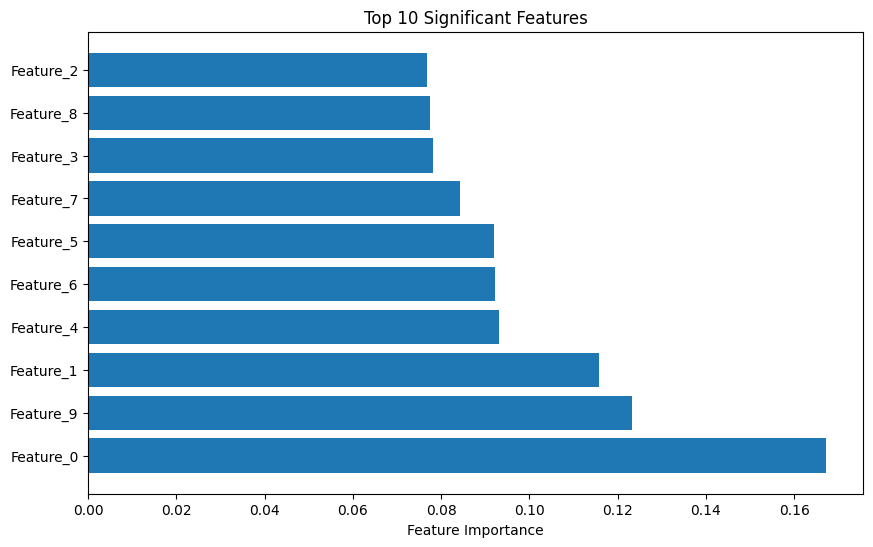

Feature Importance:
      Feature  Importance
0  Feature_0    0.167281
9  Feature_9    0.123257
1  Feature_1    0.115872
4  Feature_4    0.093078
6  Feature_6    0.092159
5  Feature_5    0.091923
7  Feature_7    0.084313
3  Feature_3    0.078064
8  Feature_8    0.077360
2  Feature_2    0.076694


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

feature_names = [f'Feature_{i}' for i in range(X_class_selected.shape[1])]
X_class_df = pd.DataFrame(X_class_selected, columns=feature_names)
rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_class_df, y_class)
feature_importances = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N important features
top_n_features = 10
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:top_n_features], feature_importance_df['Importance'][:top_n_features])
plt.xlabel('Feature Importance')
plt.title('Top {} Significant Features'.format(top_n_features))
plt.show()

print("Feature Importance:\n", feature_importance_df)


##4. Data Visualization

####Distribution of Disease State: Countplot Analysis on DNA Metadata

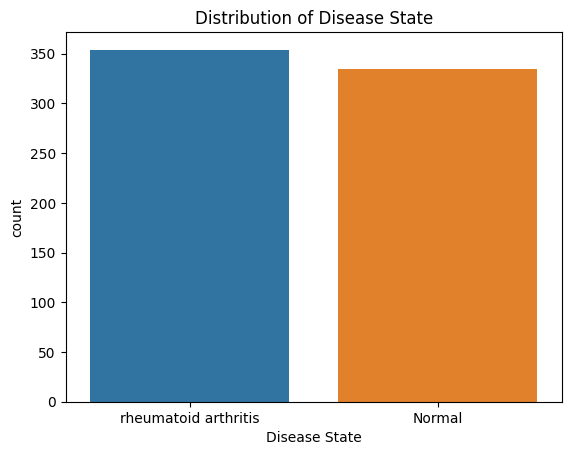

In [ ]:
sns.countplot(x='Disease State', data=DNA_metadata)
plt.title('Distribution of Disease State')
plt.show()


####Histogram of Age Distribution: Exploring Frequency of Age in DNA Metadata

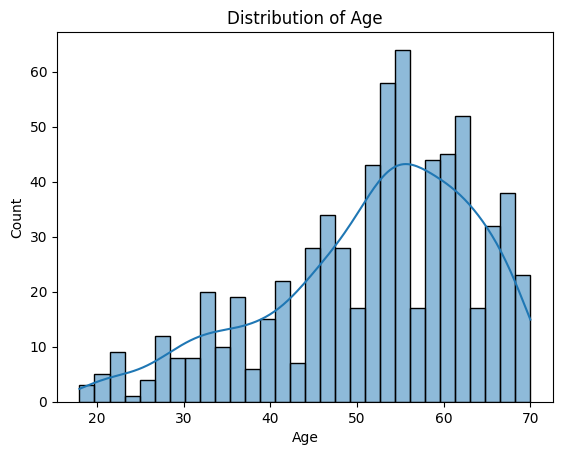

In [ ]:
sns.histplot(data=merged_data, x='Age', bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

####Exploring Age Distribution by Disease State: Boxplot Analysis with Categorical Encoding

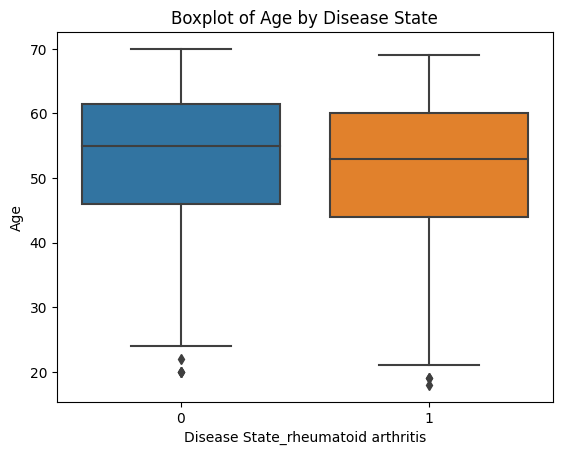

In [ ]:
import seaborn as sns
DNA_metadata['Age'] = pd.to_numeric(DNA_metadata['Age'], errors='coerce')
DNA_metadata = pd.get_dummies(DNA_metadata, columns=['Disease State'], drop_first=True)
sns.boxplot(x='Disease State_rheumatoid arthritis', y='Age', data=DNA_metadata)
plt.title('Boxplot of Age by Disease State')
plt.show()


In [ ]:
# Feature selection
features = merged_data.filter(regex='^cg', axis=1)

# Target variable for regression
target_regression = merged_data['Age']


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_regression, test_size=0.2, random_state=42)

# Create a linear regression model
regression_model = LinearRegression()

# Fit the model to the training data
regression_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = regression_model.predict(X_test)

# Evaluate the model (for example, using mean squared error)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 21.740895079888126


In [ ]:
threshold = 5

accuracy_regression = sum(abs(predictions - y_test) <= threshold) / len(y_test)

print("Accuracy (Regression):", accuracy_regression)


Accuracy (Regression): 0.7318840579710145


**Project Overview**

**Objective:**

  The objective of this project is to conduct comprehensive research on aging using genome-wide DNA methylation data extracted from peripheral blood leukocytes (PBLs). The dataset includes samples categorized as Rheumatoid arthritis patients or normal controls, and the analysis will focus on features represented by columns starting with 'cg.' The primary targets for analysis are 'Disease Status' and 'Age.'

**Methodology:**

  The various Machine Learning Techniques used in the project is discussed below along with the results from each section.

1. **Exploratory Data Analysis (EDA)**

  We have studied the data and made following comparisons that helped us better train our model. The comparisons are as follows.


*   **Visualization of Disease Status Distribution: Countplot of Disease State in Merged Data:**
The visualization shows the distribution of dataset between diseased and normal subjects is more or less equal.

*   **Exploration of Age Distribution and Its Relationship with the Target-Histogram with KDE Plot:**
The distribution of Age peaked between 50-60 years of age.

*   **Exploring and Analyzing the 'Age' Column: Data Type Check, Unique Values, and Count Distribution:**
This confirmed the analysis made in the above segment.

*   **Exploring Missing Values - Heatmap Visualization of Missing Values in Merged Data:**
Exploring missing values elicited that there were no missing values in the dataset.

*   **Exploration of Gender and Smoking Status Distribution: Countplot Analysis:**There were more female subjects when compared to male subjects in the given dataset. Also, more than half the subjects were either current smokers or smoked in the past.

2. **Feature Selection**

  We have made use of the **SelectKBest** method as scoring function for feature selection. This is a common technique for selecting the k best features from a dataset for classification tasks

3. **Model Training**

  We have trained two different classifiers to predict age and Disease status
  * **Random forest Classifier** - Disease status - Accuracy of 76%

  * **Regression Classifier** - Age - Accuracy of 73%



4. **Cross Validation**

  For cross validation of Random Forest Classifier we haveused Stratified K-Fold Analysis. The mean validation score for the method was 75%.


5. **Evaluation metrics**

  The evaluation metrics considered for the model was Recall and Precision. The metrics scores were perfect for both target vales with score as 1.0

6. **Feature Importance Analysis: Top N Significant Features**

 In this section we explored the features that were the most significant in influencing the classification. We have considered only the top 10 for our convinience.


7. **Visualization:**

  **Distribution of Disease State: Countplot Analysis on DNA Metadata**

  The data is balanced becuase the two classes in the target variable are equally distributed.

  **Histogram of Age Distribution: Exploring Frequency of Age in DNA Metadata**

  The distribution of age is left skewed indicating a majority of individuals towards older ages with a tail extending to younger ages.

  **Exploring Age Distribution by Disease State: Boxplot Analysis with Categorical Encoding**
  The Boxplot describes the distribution of ages, differentiating between the observations with and without a diseased status. The outliers withing each category are visually represented.

**Conclusion:**

  This project aims to leverage machine learning techniques to analyze DNA methylation data and uncover significant features associated with the aging process or disease status. Through effective data loading, exploratory data analysis, feature selection, model training, and data visualization, the project aims to contribute valuable insights to the field of aging research.

